In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('datasets/Social_Network_Ads.csv')
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    str  
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(4), str(1)
memory usage: 15.8 KB


In [3]:
data.shape

(400, 5)

In [4]:
data.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.groupby('Purchased').count()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


In [6]:
le = LabelEncoder()
data['Gender_E'] = le.fit_transform(data.Gender)

In [7]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_E
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [8]:
inputs = data.iloc[:,[2,3,5]]
inputs

,Age,EstimatedSalary,Gender_E
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [9]:
outputs = data['Purchased']
outputs.shape

(400,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
list_k = []
list_acc = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors= K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value, ": Accuracy is ", accuracy_score(y_test, y_pred))

k =  2 : Accuracy is  0.8416666666666667
k =  3 : Accuracy is  0.85
k =  4 : Accuracy is  0.875
k =  5 : Accuracy is  0.8666666666666667
k =  6 : Accuracy is  0.875
k =  7 : Accuracy is  0.8666666666666667


In [13]:
position = list_acc.index(max(list_acc))
k = list_k[position]
print("The optimal number of neighbors is", k, "with", list_acc[position])

The optimal number of neighbors is 4 with 87.5


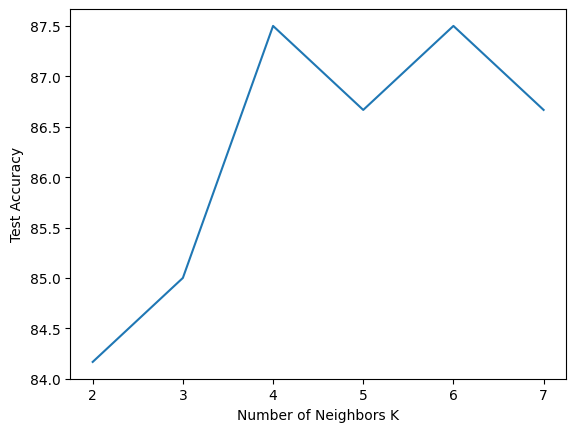

In [14]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [15]:
for i in (4,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print('k=', i, ': The Train prediction accuracy is: ', knn.score(X_train, y_train)*100, '%')
    print('------- The Test prediction accuracy is: ', knn.score(X_test, y_test)*100, '%')

k= 4 : The Train prediction accuracy is:  93.57142857142857 %
------- The Test prediction accuracy is:  87.5 %
k= 6 : The Train prediction accuracy is:  93.21428571428572 %
------- The Test prediction accuracy is:  87.5 %


In [16]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print('The Train prediction accuracy is: ', knn.score(X_train, y_train)*100, '%')
print('The Test prediction accuracy is: ', knn.score(X_test, y_test)*100, '%')

The Train prediction accuracy is:  93.21428571428572 %
The Test prediction accuracy is:  87.5 %


In [17]:
confusion_matrix(y_test, y_pred)

array([[60, 12],
       [ 4, 44]])

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



##### Feature Selection

In [19]:
data_sub = data.iloc[:,[2,3,5,4]]
corrmat = data_sub.corr()
top_corr_features = corrmat.index

In [20]:
data_sub.corr()

,Age,EstimatedSalary,Gender_E,Purchased
Age,1.000000,0.155238,-0.073741,0.622454
EstimatedSalary,0.155238,1.000000,-0.060435,0.362083
Gender_E,-0.073741,-0.060435,1.000000,-0.042469
Purchased,0.622454,0.362083,-0.042469,1.000000


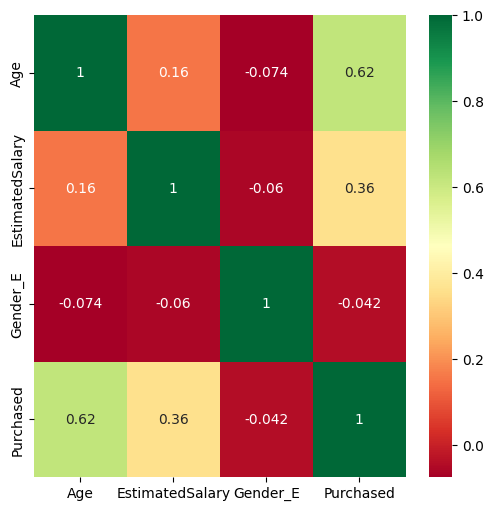

In [21]:
plt.figure(figsize=(6,6))
g = sns.heatmap(data[top_corr_features].corr(), cmap='RdYlGn', annot=True)

In [22]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(inputs, outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

In [23]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(4, 'Score'))

             Specs          Score
1  EstimatedSalary  872013.169231
0              Age     451.155226
2         Gender_E       0.367946


In [24]:
inputs_new = data.iloc[:,[2,3]]
inputs_new.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [25]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(inputs_new, outputs
                                                            , test_size = 0.3, random_state=1)

In [26]:
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train_n)
X_test_n = sc.transform(X_test_n)

In [27]:
list_k = []
list_account = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train_n, y_train_n)
    y_pred = neigh.predict(X_test_n)
    acc = accuracy_score(y_test, y_pred)*100
    list_acc.append(acc)
    print('k=', K_value, ": Accuracy is ", accuracy_score(y_test, y_pred))

k= 2 : Accuracy is  0.8416666666666667
k= 3 : Accuracy is  0.875
k= 4 : Accuracy is  0.8833333333333333
k= 5 : Accuracy is  0.875
k= 6 : Accuracy is  0.875
k= 7 : Accuracy is  0.8666666666666667


>  Choose k-4 becuase it has highest accuracy